In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [207]:
df1 =pd.read_csv('BillNo_IEC_Buyer_HSN_Wise_Exp_Feb_22_Report_01.csv')
df2 =pd.read_csv('BillNo_IEC_Buyer_HSN_Wise_Exp_Feb_22_Report_02.csv')
df3 =pd.read_csv('BillNo_IEC_Buyer_HSN_Wise_Exp_Feb_22_Report_03.csv')
df = pd.concat([df1,df2,df3])

/var/folders/95/070fvw3n5qqbp1lk0l2vg9lw0000gn/T/ipykernel_88956/617695822.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 =pd.read_csv('BillNo_IEC_Buyer_HSN_Wise_Exp_Feb_22_Report_01.csv')
/var/folders/95/070fvw3n5qqbp1lk0l2vg9lw0000gn/T/ipykernel_88956/617695822.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 =pd.read_csv('BillNo_IEC_Buyer_HSN_Wise_Exp_Feb_22_Report_02.csv')
/var/folders/95/070fvw3n5qqbp1lk0l2vg9lw0000gn/T/ipykernel_88956/617695822.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 =pd.read_csv('BillNo_IEC_Buyer_HSN_Wise_Exp_Feb_22_Report_03.csv')


# Cleaning 

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190599 entries, 0 to 375124
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   BILL_NO          1190599 non-null  int64  
 1   EXP_DATE         1190599 non-null  object 
 2   IEC              1190599 non-null  object 
 3   EXPORTER_NAME    1190537 non-null  object 
 4   ADDRESS          1187258 non-null  object 
 5   CITY             1187222 non-null  object 
 6   PIN              1169487 non-null  float64
 7   PHONE_No         1069572 non-null  object 
 8   EMAIL            1038621 non-null  object 
 9   CONTACT_PERSON   1098417 non-null  object 
 10  INDIAN_PORT      1190599 non-null  object 
 11  COUNTRY          1190598 non-null  object 
 12  FOREIGN_PORT     1190599 non-null  object 
 13  BUYER_NAME       1175281 non-null  object 
 14  HS_CODE          1190599 non-null  int64  
 15  UNIT             1190599 non-null  object 
 16  SUM_OF_QUANTITY  11

NAN => EXPORTER_NAME, ADDRESS, CITY, PIN, PHONE_NO, EMAIL, CONTACT_PERSON, COUNTRY, BUYER_NAME, PAN_NO

In [238]:
df1=df[df.isna().any(axis=1)]
IEC_EXPO =pd.DataFrame(df,columns=['IEC','EXPORTER_NAME'])
new = IEC_EXPO.drop_duplicates(subset=['IEC', 'EXPORTER_NAME'],keep='first').reset_index()
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75087 entries, 0 to 75086
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          75087 non-null  int64 
 1   IEC            75087 non-null  object
 2   EXPORTER_NAME  75078 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [269]:
for i in range(0,1190599):
    if df.iloc[[i]]['EXPORTER_NAME'].isnull().any():
        print(df.iloc[[i]]['IEC'])
        for j in range(0,75087):
            if str(df.iloc[[i]]['IEC']) == str(df.iloc[[j]]['IEC']) and i!=j:
                df.iloc[[i]]['EXPORTER_NAME'] = df.iloc[[j]]['EXPORTER_NAME']
                print(df.iloc[[j]]['EXPORTER_NAME'])

    


190045    592015220
Name: IEC, dtype: object
190046    592015220
Name: IEC, dtype: object
190047    592015220
Name: IEC, dtype: object
190048    592015220
Name: IEC, dtype: object
190049    592015220
Name: IEC, dtype: object
190050    592015220
Name: IEC, dtype: object
190051    592015220
Name: IEC, dtype: object
190052    592015220
Name: IEC, dtype: object
190053    592015220
Name: IEC, dtype: object
190054    592015220
Name: IEC, dtype: object
190055    592015220
Name: IEC, dtype: object
207732    610003194
Name: IEC, dtype: object
207733    610003194
Name: IEC, dtype: object
358201    5210012620
Name: IEC, dtype: object
395938    ABSFA7085Q
Name: IEC, dtype: object
395939    ABSFA7085Q
Name: IEC, dtype: object
407259    AMJPK5913D
Name: IEC, dtype: object
49018    316934313
Name: IEC, dtype: object
168899    589001981
Name: IEC, dtype: object
168900    589001981
Name: IEC, dtype: object
172686    592015220
Name: IEC, dtype: object
172687    592015220
Name: IEC, dtype: object


KeyboardInterrupt: 

In [ ]:
result[4]

array(['200000829', 'SALTS AND CHEMICALS PRIVATE LIMITED'], dtype='<U35')

# EXPORTER/ PAN count

In [112]:
print(df['EXPORTER_NAME'].nunique())
print(df['PAN_NO'].nunique())

70000
68679


# AIR/SEA 

In [280]:
sea_port=0
air=0
via_road=0

for item in df['INDIAN_PORT'].iteritems():
    if 'SEA' in item[1] or 'PORT' in item[1] or 'ICD' in item[1] or 'LCS' in item[1]:
        sea_port +=1
    elif 'AIR' in item[1]:
        air+=1
    else:
        via_road+=1

print('Via sea are' , sea_port)
print('Via air are', air)
print('Not sure about', via_road)
print(sea_port + air + via_road)

df_sea =df[df['INDIAN_PORT'].str.contains('LCS')]
df_air =df[df['INDIAN_PORT'].str.contains('AIR')]
df_via_road =df[df['INDIAN_PORT'].str.contains('SEA' or 'PORT' or'AIR' or 'ICD' or 'LCS')==False]
df_sea

Via sea are 659525
Via air are 312051
Not sure about 219023
1190599


,BILL_NO,EXP_DATE,IEC,EXPORTER_NAME,ADDRESS,CITY,PIN,PHONE_No,EMAIL,CONTACT_PERSON,INDIAN_PORT,COUNTRY,FOREIGN_PORT,BUYER_NAME,HS_CODE,UNIT,SUM_OF_QUANTITY,SUM_OF_FOB_INR,PAN_NO
19,8022200,2022-02-06,200001981,CARTER CONTAINERS COMPANY PRIVATE LIMITED,"P-223, BLOCK- J, NEW ALIPORE, FLAT NO.1, CONTA...","KOLKATA, W.B",700053.0,'24008365,cartercan@vsnl.net,SUYASH PODDAR,LCS NEPALGUNJ ROAD,NEPAL,NEPAL,ASHIRBAD PAINTS PRIVATE LIMITED,73102190,PCS,210.0,50000,AABCC0576H
20,8022200,2022-02-06,200001981,CARTER CONTAINERS COMPANY PRIVATE LIMITED,"P-223, BLOCK- J, NEW ALIPORE, FLAT NO.1, CONTA...","KOLKATA, W.B",700053.0,'24008365,cartercan@vsnl.net,SUYASH PODDAR,LCS NEPALGUNJ ROAD,NEPAL,NEPAL,ASHIRBAD PAINTS PRIVATE LIMITED,73102910,PCS,22855.0,537000,AABCC0576H
138,7907352,2022-02-01,200014935,K D S ENTERPRISE,"ANANDA MARKET, CHAKDA ROAD, BONGAON, (N)24PGS",WEST BENGAL,743235.0,NaN,NaN,NaN,GHOJADANGA LCS,BANGLADESH,BHOMRA,USHA TRADING,8109010,KGS,1260.0,55000,AMNPS2022H
139,7907352,2022-02-01,200014935,K D S ENTERPRISE,"ANANDA MARKET, CHAKDA ROAD, BONGAON, (N)24PGS",WEST BENGAL,743235.0,NaN,NaN,NaN,GHOJADANGA LCS,BANGLADESH,BHOMRA,USHA TRADING,8061000,KGS,15840.0,697000,AMNPS2022H
140,7933945,2022-02-02,200014935,K D S ENTERPRISE,"ANANDA MARKET, CHAKDA ROAD, BONGAON, (N)24PGS",WEST BENGAL,743235.0,NaN,NaN,NaN,GHOJADANGA LCS,BANGLADESH,BHOMRA,USHA TRADING,8109010,KGS,1200.0,53000,AMNPS2022H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374307,8579094,2022-02-28,IWQPK0735Q,SAMRIN ENTERPRISE,"VILL-AMARKATI, PO-BIRAMNAGAR PS-BASIRHAT CONTA...",BASIRHAT,743422.0,'917585938995,samrinenterprise01@gmail.com,KHADIJA KHATUN,GHOJADANGA LCS,BANGLADESH,BHOMRA,D S INTERNATIONAL,25291020,MTS,100.0,639000,IWQPK0735Q
374308,8559943,2022-02-28,IWQPK0735Q,SAMRIN ENTERPRISE,"VILL-AMARKATI, PO-BIRAMNAGAR PS-BASIRHAT CONTA...",BASIRHAT,743422.0,'917585938995,samrinenterprise01@gmail.com,KHADIJA KHATUN,GHOJADANGA LCS,BANGLADESH,BHOMRA,HUA THAI CERAMICS INDUSTRY LIMITED,25291010,MTS,198.0,839000,IWQPK0735Q
374870,8434276,2022-02-23,LEGPS0115D,ARJINA ENTERPRISE,VILL. - GADAMAHALI UTTAR UMARPUR PO. - UTTAR M...,ENGLISH BAZAR,732216.0,'919933895422,arjinanterprise.malda@gmail.com,MAHI SK,MAHADIPUR LCS,BANGLADESH,SONAMOSJID,RIAD INTERNATIONAL,25171010,KGS,96000.0,79000,LEGPS0115D
374892,8532058,2022-02-26,LGMPS6425E,WASIM EXPORT,VILL- MAHADIPUR P.O.- UTTAR MAHADIPUR,ENGLISH BAZAR,732216.0,'919932932529,wasimexport.jiaul@gmail.com,JIAUL SEIKH,MAHADIPUR LCS,BANGLADESH,SONAMOSJID,BADSHAH STORE,25171010,MTS,100.0,82000,LGMPS6425E


# top destination ports &top commodities (change df to df_sea/df_air/df_via_road to get specific info)

<BarContainer object of 10 artists>

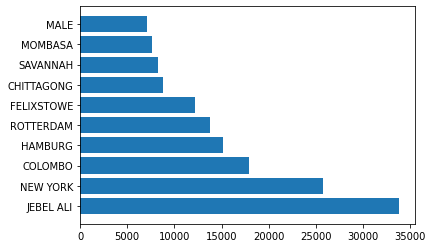

In [270]:
# print(pd.Series(df_air['FOREIGN_PORT']).value_counts().head(20))
port_ser =pd.Series(df_sea['FOREIGN_PORT']).value_counts().head(10)
plt.barh( port_ser.index ,port_ser.values)



In [201]:
print(pd.Series(df_air['HS_CODE']).value_counts().head(20))
# hs_ser =pd.Series(df_air['HS_CODE']).value_counts().head(2)
# plt.barh( hs_ser.index ,hs_ser.values)

30049099    5493
7099990     5130
87089900    4062
42022190    3387
42022220    3387
84819090    3335
61091000    2777
62114290    2689
62044290    2651
88073000    2528
62044390    2478
85389000    2320
71179090    2269
43039090    2146
62114300    1981
8039010     1951
62063090    1935
29420090    1916
39269099    1894
85369090    1619
Name: HS_CODE, dtype: int64


In [273]:
exporter_count = Counter(df['INDIAN_PORT'])
print(exporter_count)


Counter({'NHAVA SHEVA SEA': 242722, 'DELHI AIR CARGO': 106119, 'BOMBAY AIR CARGO': 74190, 'CHENNAI SEA': 65659, 'MUNDRA SEA': 64599, 'TUTICORIN SEA': 47025, 'BANGALORE AIR CARGO': 42083, 'CHENNAI AIR CARGO': 32113, 'TUGHLAKABAD': 22385, 'RAXAUL': 22012, 'PETRAPOLE ROAD': 20778, 'JAIGAON': 20134, 'AHMEDABAD AIR CARGO': 18412, 'COCHIN SEA': 18351, 'SONAULI': 16749, 'PCCCC BANDRA-KURLA COMPLEX': 15474, 'KOLKATA SEA': 14949, 'TIRUVALLUR-ILP ICD': 13758, 'SABARMATI ICD': 12887, 'BANGALORE ICD': 12035, 'HAZIRA PORT/SURAT SEA': 11835, 'TUTICORIN ICD': 11157, 'KATTUPALLI VILLAGE,PONNERI TALUK,TIRUVALLUR SEA': 10920, 'TIRUPPUR - CHETTIPALAYAM CFS': 10685, 'PIYALA/BALLABHGARH ICD': 10550, 'DADRI-ACPL CFS': 10420, 'GARHI HARSARU - GURGAON ICD': 9686, 'KOLKATA AIR CARGO': 9608, 'JOGBANI': 9122, 'JAIPUR AIR CARGO': 8785, 'HYDERABAD AIR CARGO': 8737, 'PATLI ICD': 8690, 'ENNORE SEA': 8352, 'DIGHI(PUNE)': 6926, 'DADRI-CGML': 6429, 'COCHIN AIR CARGO': 6351, 'FARIDABAD': 5869, 'PUNE-TALEGOAN ICD': 5864,

# Segmentation

In [205]:
df_new = df.groupby(['EXPORTER_NAME']).HS_CODE.count().reset_index()
print(df_new.sort_values('HS_CODE',ascending=False).head(20))
# x = pd.DataFrame.from_dict(exporter_count, orient='index')
# x.plot(kind='bar')
# df_new=df.groupby(['INDIAN_PORT']).size().to_frame().sort_values([0], ascending = False).head(10).reset_index()
# plt.hist(df_new, x='INDIAN_PORT', y = 'count')

                                           EXPORTER_NAME  HS_CODE
30888                                KHEMCHAND HANDICRAF     9119
41023                 NISSAN MOTOR INDIA PRIVATE LIMITED     8809
35972                        MARUTI SUZUKI INDIA LIMITED     8532
8304                                  BAJAJ AUTO LIMITED     8297
54364                      SHAHI EXPORTS PRIVATE LIMITED     8130
23813                              HERO MOTOCORP LIMITED     6557
38052                                MOBIS INDIA LIMITED     4748
18387                 FAIR EXPORTS INDIA PRIVATE LIMITED     4632
29275                                 K P R MILL LIMITED     4504
8527                       BALKRISHNA INDUSTRIES LIMITED     4400
18918                FINESSE MARKET LINK PRIVATE LIMITED     3754
53740                       SCM GARMENTS PRIVATE LIMITED     3504
19318                         FORD INDIA PRIVATE LIMITED     3271
49224                      RENAULT INDIA PRIVATE LIMITED     2981
49147     

In [186]:
segment = df.groupby(['EXPORTER_NAME']).UNIT.count().reset_index()
print (segment.sort_values('UNIT',ascending=False).head(20))

                                           EXPORTER_NAME  UNIT
30888                                KHEMCHAND HANDICRAF  9119
41023                 NISSAN MOTOR INDIA PRIVATE LIMITED  8809
35972                        MARUTI SUZUKI INDIA LIMITED  8532
8304                                  BAJAJ AUTO LIMITED  8297
54364                      SHAHI EXPORTS PRIVATE LIMITED  8130
23813                              HERO MOTOCORP LIMITED  6557
38052                                MOBIS INDIA LIMITED  4748
18387                 FAIR EXPORTS INDIA PRIVATE LIMITED  4632
29275                                 K P R MILL LIMITED  4504
8527                       BALKRISHNA INDUSTRIES LIMITED  4400
18918                FINESSE MARKET LINK PRIVATE LIMITED  3754
53740                       SCM GARMENTS PRIVATE LIMITED  3504
19318                         FORD INDIA PRIVATE LIMITED  3271
49224                      RENAULT INDIA PRIVATE LIMITED  2981
49147                        RELIANCE INDUSTRIES LIMITE

In [190]:
segment = df.groupby(['EXPORTER_NAME']).SUM_OF_FOB_INR.sum().reset_index()
print (segment.sort_values('SUM_OF_FOB_INR',ascending=False).head(20))

                                        EXPORTER_NAME  SUM_OF_FOB_INR
49147                     RELIANCE INDUSTRIES LIMITED     55639777000
26374                     INTERGLOBE AVIATION LIMITED     29575669000
52590       SAMSUNG INDIA ELECTRONICS PRIVATE LIMITED     25809677000
56036        SHREE RAMKRISHNA EXPORTS PRIVATE LIMITED     24415028000
25576                  INDIAN OIL CORPORATION LIMITED     21022067000
28843                               JSW STEEL LIMITED     20263108000
9485                      BHARAT PETROLEUM CORPORATLT     17632122000
24194                     HINDALCO INDUSTRIES LIMITED     13225167000
8304                               BAJAJ AUTO LIMITED     12267594000
65527        UNITED SEAMLESS TUBULAAR PRIVATE LIMITED     11920143000
35972                     MARUTI SUZUKI INDIA LIMITED     11772673000
68989  WISTRON INFOCOMM MANUFACTURING INDIA PRIVATE L     11732229000
62638                              TATA STEEL LIMITED     11249116000
68770             WE

# Prime customers

In [193]:
eighty = 0.8*segment['SUM_OF_FOB_INR'].sum()
temp=0
count=0
for i in segment['SUM_OF_FOB_INR']:
    if temp<=eighty:
        temp+=i
        count+=1
print (segment.sort_values('SUM_OF_FOB_INR',ascending=False).head(count))


                                   EXPORTER_NAME  SUM_OF_FOB_INR
49147                RELIANCE INDUSTRIES LIMITED     55639777000
26374                INTERGLOBE AVIATION LIMITED     29575669000
52590  SAMSUNG INDIA ELECTRONICS PRIVATE LIMITED     25809677000
56036   SHREE RAMKRISHNA EXPORTS PRIVATE LIMITED     24415028000
25576             INDIAN OIL CORPORATION LIMITED     21022067000
...                                          ...             ...
56282                                     SHREEM          364000
2779                                  AJA EXPORT          364000
6532                            ASHA METAL UDYOG          364000
53662     SCENTOCHEM FRAGRANCES AND FLAVOURS INC          364000
61144                               SUNSHINE TEA          364000

[56037 rows x 2 columns]


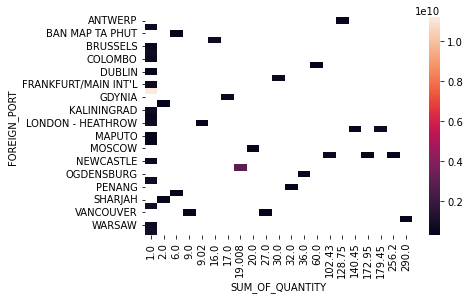

In [203]:
multi_query = """SUM_OF_FOB_INR>=300000000 & \
                SUM_OF_QUANTITY<=300 """
df_filtered = df.query(multi_query)
df_piv=df_filtered.pivot_table(index='FOREIGN_PORT', columns='SUM_OF_QUANTITY',values='SUM_OF_FOB_INR')
ax = sns.heatmap(df_piv)